In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import dynadojo.dynadojo as dd
import numpy as np

2023-06-17 18:14:17.363395: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


/Users/logan/PycharmProjects/DynaScale/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/logan/PycharmProjects/DynaScale/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/logan/PycharmProjects/DynaScale/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an nd

(<Figure size 640x480 with 1 Axes>, <Axes: >)

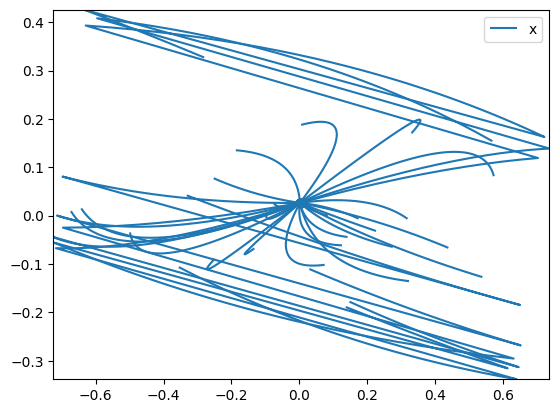

In [18]:
latent_dim = 2
embed_dim = 4  # NOTE: embed_dim must be <= 2 * latent_dim
n = 100
timesteps = 50
challenge = dd.systems.SNNSystem(latent_dim, embed_dim)
x0 = challenge.make_init_conds(n)
x = challenge.make_data(x0,  control=np.zeros((n, timesteps, embed_dim)), timesteps=timesteps)
dd.utils.lds.plot([x], target_dim=2, labels=["x"], max_lines=30)

In [19]:
model = dd.baselines.dnn.DNN(embed_dim, timesteps, activation="relu", max_control_cost=0)
model.fit(x, epochs=1000, verbose='auto')

Epoch 1/1000
4/4 [==============================] - 2s 16ms/step - loss: 1.5156
Epoch 2/1000
4/4 [==============================] - 0s 8ms/step - loss: 1.4614
Epoch 3/1000
4/4 [==============================] - 0s 7ms/step - loss: 1.4090
Epoch 4/1000
4/4 [==============================] - 0s 7ms/step - loss: 1.3582
Epoch 5/1000
4/4 [==============================] - 0s 7ms/step - loss: 1.3090
Epoch 6/1000
4/4 [==============================] - 0s 6ms/step - loss: 1.2613
Epoch 7/1000
4/4 [==============================] - 0s 6ms/step - loss: 1.2152
Epoch 8/1000
4/4 [==============================] - 0s 6ms/step - loss: 1.1706
Epoch 9/1000
4/4 [==============================] - 0s 10ms/step - loss: 1.1276
Epoch 10/1000
4/4 [==============================] - 0s 7ms/step - loss: 1.0861
Epoch 11/1000
4/4 [==============================] - 0s 6ms/step - loss: 1.0460
Epoch 12/1000
4/4 [==============================] - 0s 9ms/step - loss: 1.0075
Epoch 13/1000
4/4 [============================

x_err=0.007548503158089722


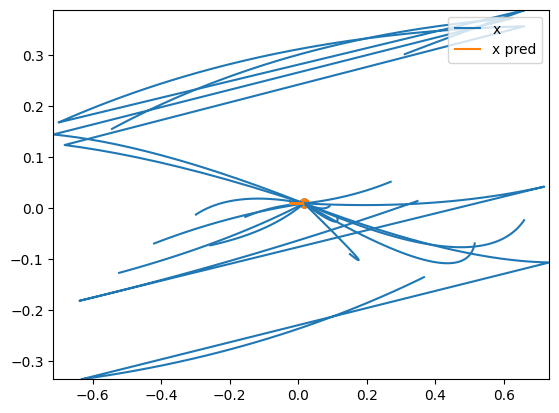

In [20]:
x_pred = model.predict(x[:, 0], 50)
dd.utils.lds.plot([x, x_pred], target_dim=min(3, latent_dim), labels=["x", "x pred"], max_lines=15)
x_err = challenge.calc_error(x, x_pred)
print(f"{x_err=}")